In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AffinityPropagation, MeanShift, SpectralClustering, AgglomerativeClustering, DBSCAN, OPTICS, Birch

from sklearn.feature_selection import VarianceThreshold, SelectKBest, r_regression
from sklearn.decomposition import PCA

In [2]:
XTRAIN = pd.read_csv("pc_X_train.csv")
YTRAIN = pd.read_csv("pc_y_train.csv")
testX = pd.read_csv("pc_X_test.csv")

XTRAIN.drop(['id'], axis=1, inplace=True)
YTRAIN.drop(['id'], axis=1, inplace=True)
testX.drop(['id'], axis=1, inplace=True)

In [3]:
varianceSelected = VarianceThreshold()
x_train_variance_selected = varianceSelected.fit_transform(XTRAIN)
featuresOutV = varianceSelected.get_feature_names_out()
x_train_variance_selected = pd.DataFrame(x_train_variance_selected, columns=featuresOutV)

x_test_variance_selected = pd.DataFrame(varianceSelected.transform(testX), columns = featuresOutV)

kBest = SelectKBest(r_regression, k=350)
x_train_k_best = kBest.fit_transform(x_train_variance_selected, YTRAIN)
featuresOutK = kBest.get_feature_names_out()
x_train_k_best = pd.DataFrame(x_train_k_best, columns=featuresOutK)

x_test_k_best = pd.DataFrame(kBest.transform(x_test_variance_selected), columns=featuresOutK)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [4]:
Xcorr = x_train_k_best.corr()
Xcorr.style.background_gradient(cmap='coolwarm')

Output hidden; open in https://colab.research.google.com to view.

In [5]:
Xcorr = x_train_k_best.corr()
cols = np.full((Xcorr.shape[0],), True, dtype=bool)
for i in range(Xcorr.shape[0]):
  for j in range(i+1, Xcorr.shape[0]):
    if 0.8 <= Xcorr.iloc[i,j]:
      if cols[j]:
        cols[j] = False
selected = x_train_k_best.columns[cols]
X_trainK = x_train_k_best[selected]

testX_K = x_test_k_best[selected]

Xcorr1 = X_trainK.corr()
Xcorr1.style.background_gradient(cmap='coolwarm')

,mean_down_time,std_down_time,max_down_time,sum_down_time,mean_length_activity,std_length_down_event,std_length_text_change,mean_length_activity-length_down_event,std_length_activity-length_down_event,mean_length_activity/length_down_event,max_length_activity/length_down_event,mean_length_activity-length_text_change,mean_length_activity/length_text_change,max_length_activity/length_text_change,mean_length_down_event-length_up_event,std_length_down_event-length_up_event,max_length_down_event/length_text_change,std_cursor_position_change1,max_cursor_position_change1,sum_cursor_position_change1,sum_free_time5,std_action_time,count_action_time_percent,activity_3_count,activity_4_count,activity_5_count,event_3_count,event_5_count,event_6_count,event_7_count,event_8_count,event_8_mean,event_9_count,event_11_count,event_13_count,event_14_count,event_15_count,event_16_count,event_17_count,event_18_count,event_19_count,event_20_count,event_20_std,event_21_count,event_22_count,event_23_count,event_24_count,event_25_count,event_26_count,event_29_count,event_29_mean
mean_down_time,1.000000,0.555150,0.656763,0.568564,0.138443,0.141811,0.005404,-0.045967,-0.009461,-0.169825,0.046429,0.134386,0.010411,-0.002403,-0.016177,0.015973,-0.000056,-0.205156,-0.114559,0.102526,0.297479,0.017210,0.061470,0.078082,0.032902,0.037718,0.028846,0.035097,0.115285,0.088934,0.048300,-0.098105,0.061171,0.031658,0.030280,0.050244,-0.001402,0.061025,0.023619,0.020976,0.006688,0.001820,0.009920,0.031775,-0.023334,0.014517,0.003916,0.040603,0.012864,0.012147,0.018082
std_down_time,0.555150,1.000000,0.481959,0.585829,0.174909,0.227211,0.026943,-0.097873,-0.010778,-0.239686,0.062229,0.201359,0.056308,0.002708,-0.007552,0.007306,-0.003191,-0.049093,0.030453,0.203239,0.673386,0.025858,0.032475,0.146738,0.037478,0.030498,0.064527,0.089192,0.149234,0.250250,0.163650,-0.063136,0.075429,0.088919,0.112043,0.068255,0.006182,0.051978,0.092788,0.057123,0.061978,0.050454,0.048307,0.021397,0.001684,0.082650,0.055656,0.070718,0.060213,-0.012783,-0.039844
max_down_time,0.656763,0.481959,1.000000,0.407422,0.071394,0.095389,0.014159,-0.039802,-0.012430,-0.097131,0.022528,0.073075,0.015520,-0.000459,-0.013277,0.013169,-0.002259,0.043063,0.049301,0.054775,0.730165,0.030788,0.012814,0.080804,0.009010,0.052239,0.001351,0.115998,0.075283,0.082907,0.036121,-0.043843,0.012923,0.028513,0.011084,0.027550,0.000939,0.025826,0.030772,0.004988,0.022717,0.021663,0.042017,0.014415,0.016457,0.039682,0.059097,0.022409,0.012147,-0.005731,-0.015452
sum_down_time,0.568564,0.585829,0.407422,1.000000,0.325597,0.292824,0.089824,-0.013190,0.071849,-0.331756,0.170261,0.307324,0.045805,0.009033,0.010743,-0.010759,0.022045,0.006729,0.204022,0.506192,0.351343,0.025742,0.073204,0.215070,0.041109,-0.006416,0.269090,0.074739,0.296092,0.534183,0.545627,0.107703,0.169946,0.118766,0.336292,0.101800,0.044930,0.085366,0.258462,0.278699,0.211779,0.098933,0.066975,0.083619,0.065411,0.157921,0.064848,0.151358,0.228904,0.055840,-0.002573
mean_length_activity,0.138443,0.174909,0.071394,0.325597,1.000000,0.643721,0.109048,0.421345,0.442032,-0.821088,0.088955,0.487509,-0.467200,0.014660,0.011984,-0.011874,-0.040563,-0.025084,-0.050132,-0.107344,0.105187,0.019487,0.145108,0.101374,0.022386,0.029184,0.543318,0.161666,0.553719,0.009747,0.013289,-0.151983,0.381830,0.018339,-0.001567,0.146251,0.142035,0.196033,0.038168,0.052435,0.003550,0.023328,0.028538,0.025937,0.059971,0.006976,0.035887,0.052010,0.029590,0.011006,-0.012908
std_length_down_event,0.141811,0.227211,0.095389,0.292824,0.643721,1.000000,0.090082,-0.276037,-0.053868,-0.754990,0.084001,0.707584,0.182146,0.031574,0.005360,-0.005191,0.039804,0.018091,-0.014195,-0.130640,0.174206,0.035467,0.063649,0.121595,0.021574,0.021355,-0.026739,0.210555,0.377010,0.004132,0.064512,-0.086113,0.186594,0.044245,0.001632,0.109238,0.169825,0.127232,0.020577,0.069623,0.008301,0.067925,0.097362,0.104422,0.074452,0.043579,0.085837,0.051465,0.039366,0.006086,-0.016324
std_length_text_change

In [6]:
for col in X_trainK.columns:
  if X_trainK[col].std() == 0.0:
    X_trainK.drop(columns=[col], inplace=True)

testX_K = testX_K[X_trainK.columns]


In [7]:
pcaK = PCA(n_components=1)
PCA = pd.DataFrame(pcaK.fit_transform(X_trainK), columns=pcaK.get_feature_names_out())
PCA.head()

,pca0
0,-5.371582e+08
1,2.636496e+09
2,2.152818e+09
3,3.931818e+08
4,-8.264075e+08


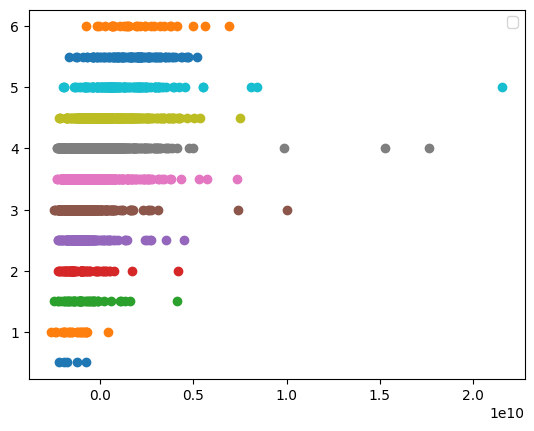

In [15]:
u_truth = np.unique(YTRAIN.score)

for i in u_truth:
    plt.plot(PCA.pca0[YTRAIN.score == i], YTRAIN.score[YTRAIN.score == i], 'o')
plt.legend()
plt.show()

In [23]:
kmeans = KMeans(n_clusters=12, random_state=120, n_init="auto")
kmeans.fit(PCA)
label = kmeans.labels_

centroids = kmeans.cluster_centers_
pca_pred = kmeans.predict(PCA)

In [24]:
centroids

array([[-2.96154875e+08],
       [ 4.29325001e+09],
       [-1.39242448e+09],
       [ 1.01058262e+09],
       [ 1.64615015e+10],
       [ 1.84524092e+09],
       [ 8.19295871e+09],
       [-1.97202944e+09],
       [-8.62176722e+08],
       [ 3.26424054e+08],
       [ 2.84726044e+09],
       [ 2.15609426e+10]])

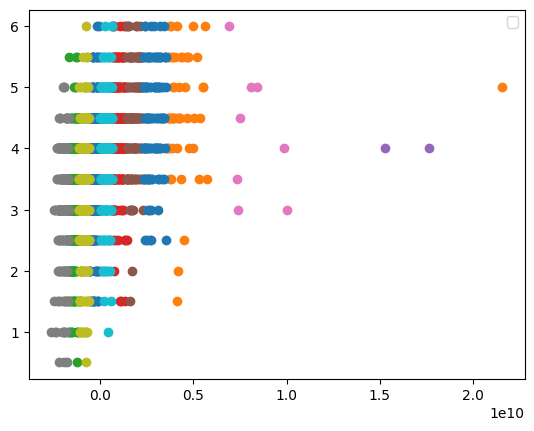

In [25]:
u_labels = np.unique(label)

#plotting the results:

for i in u_labels:
    plt.plot(PCA.pca0[label == i], YTRAIN.score[label == i], 'o')
plt.legend()
plt.show()

In [32]:
from sklearn.decomposition import PCA
pca_aff = PCA(n_components=2)
PCA_aff = pd.DataFrame(pca_aff.fit_transform(X_trainK), columns=pca_aff.get_feature_names_out())
PCA_aff.head()

,pca0,pca1
0,-5.371582e+08,845935.943127
1,2.636496e+09,-783351.740033
2,2.152818e+09,-420025.866485
3,3.931818e+08,615562.498698
4,-8.264075e+08,476647.301278


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


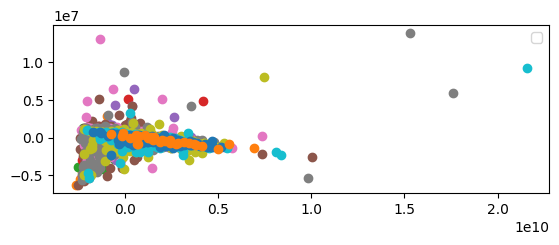

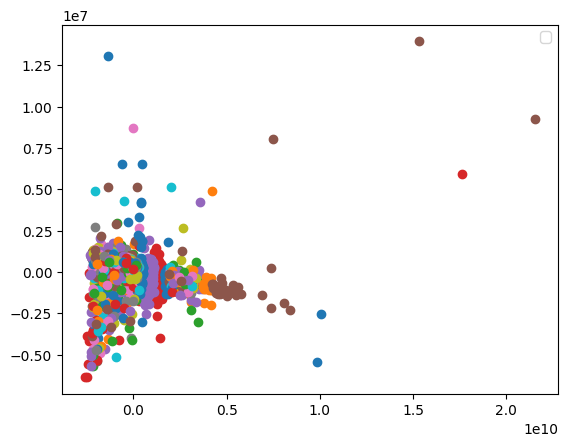

In [38]:
aff = AffinityPropagation(random_state=120)
aff.fit(PCA_aff)
label_aff = aff.labels_
centroids = aff.cluster_centers_

ax1 = plt.subplot(212)
for i in u_truth:
    ax1.plot(PCA_aff.pca0[YTRAIN.score == i], PCA_aff.pca1[YTRAIN.score == i], 'o')
plt.legend()
plt.show()

u_labels = np.unique(label_aff)
for i in u_labels:
    plt.plot(PCA_aff.pca0[label_aff == i], PCA_aff.pca1[label_aff == i], 'o')
plt.legend()
plt.show()

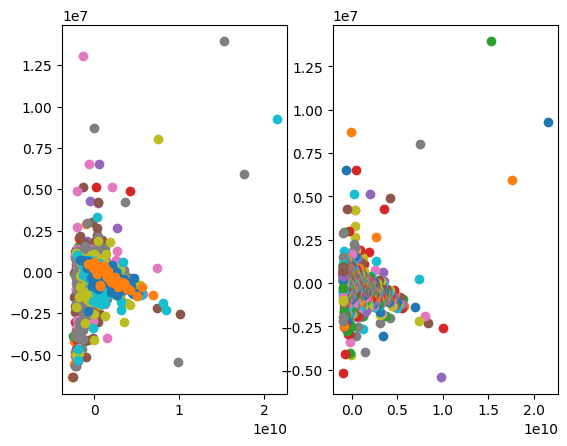

In [41]:
meanS = MeanShift(bandwidth=2, cluster_all=False)
meanS.fit(PCA_aff)
label_meanS = meanS.labels_

ax1 = plt.subplot(121)
for i in u_truth:
    ax1.plot(PCA_aff.pca0[YTRAIN.score == i], PCA_aff.pca1[YTRAIN.score == i], 'o')

ax2 = plt.subplot(122)
u_labels = np.unique(label_aff)
for i in u_labels:
    ax2.plot(PCA_aff.pca0[label_meanS == i], PCA_aff.pca1[label_meanS == i], 'o')
plt.show()

In [48]:
!pip install pyamg


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 7.2 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


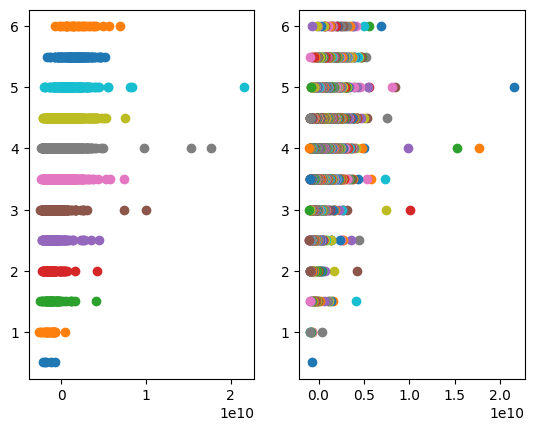

In [50]:
SC = SpectralClustering(n_clusters=12, eigen_solver='amg')
SC.fit(PCA_aff)
label_SC = meanS.labels_

ax1 = plt.subplot(121)
for i in u_truth:
    ax1.plot(PCA_aff.pca0[YTRAIN.score == i], YTRAIN.score[YTRAIN.score == i], 'o')

ax2 = plt.subplot(122)
u_labels = np.unique(label_aff)
for i in u_labels:
    ax2.plot(PCA_aff.pca0[label_SC == i], YTRAIN.score[label_SC == i], 'o')
plt.show()

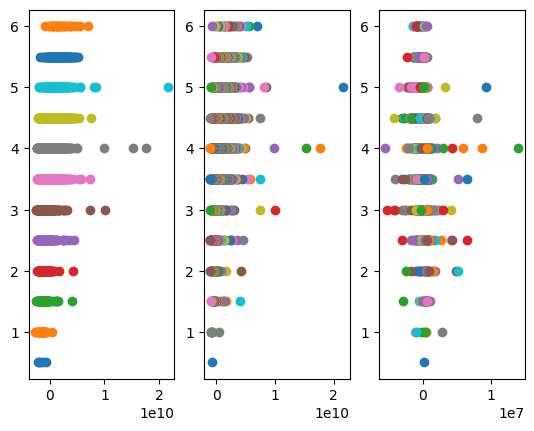

In [61]:
AC = AgglomerativeClustering(compute_full_tree='auto', linkage='single')
AC.fit(PCA_aff)
label_AC = meanS.labels_

ax1 = plt.subplot(131)
for i in u_truth:
    ax1.plot(PCA_aff.pca0[YTRAIN.score == i], YTRAIN.score[YTRAIN.score == i], 'o')

ax2 = plt.subplot(132)
u_labels = np.unique(label_aff)
for i in u_labels:
    ax2.plot(PCA_aff.pca0[label_AC == i], YTRAIN.score[label_AC == i], 'o')

ax3 = plt.subplot(133)
u_labels = np.unique(label_aff)
for i in u_labels:
    ax3.plot(PCA_aff.pca1[label_AC == i], YTRAIN.score[label_AC == i], 'o')
plt.show()

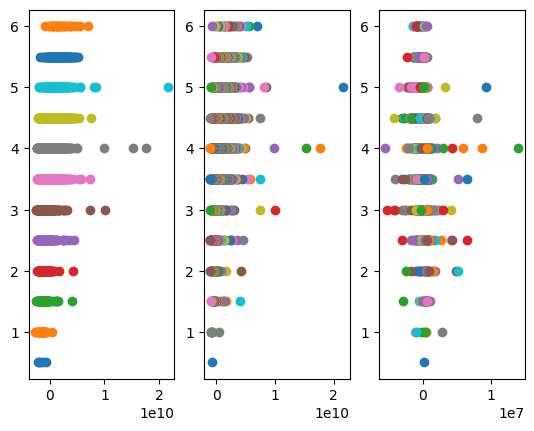

In [69]:
AC = AgglomerativeClustering(compute_full_tree='auto', linkage='single')
AC.fit(PCA_aff)
label_AC = meanS.labels_

ax1 = plt.subplot(131)
for i in u_truth:
    ax1.plot(PCA_aff.pca0[YTRAIN.score == i], YTRAIN.score[YTRAIN.score == i], 'o')

ax2 = plt.subplot(132)
u_labels = np.unique(label_aff)
for i in u_labels:
    ax2.plot(PCA_aff.pca0[label_AC == i], YTRAIN.score[label_AC == i], 'o')

ax3 = plt.subplot(133)
u_labels = np.unique(label_aff)
for i in u_labels:
    ax3.plot(PCA_aff.pca1[label_AC == i], YTRAIN.score[label_AC == i], 'o')
plt.show()

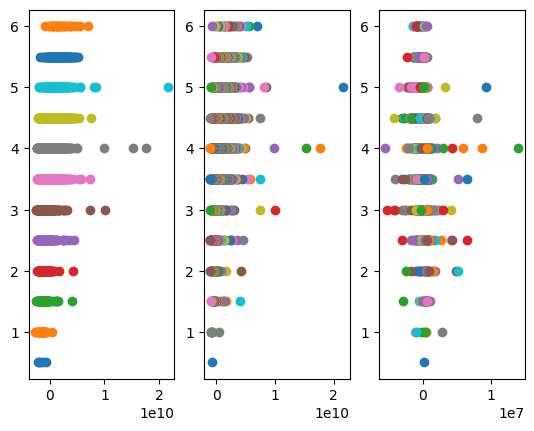

In [70]:
AC = AgglomerativeClustering(compute_full_tree='auto', linkage='average')
AC.fit(PCA_aff)
label_AC = meanS.labels_

ax1 = plt.subplot(131)
for i in u_truth:
    ax1.plot(PCA_aff.pca0[YTRAIN.score == i], YTRAIN.score[YTRAIN.score == i], 'o')

ax2 = plt.subplot(132)
u_labels = np.unique(label_aff)
for i in u_labels:
    ax2.plot(PCA_aff.pca0[label_AC == i], YTRAIN.score[label_AC == i], 'o')

ax3 = plt.subplot(133)
u_labels = np.unique(label_aff)
for i in u_labels:
    ax3.plot(PCA_aff.pca1[label_AC == i], YTRAIN.score[label_AC == i], 'o')
plt.show()

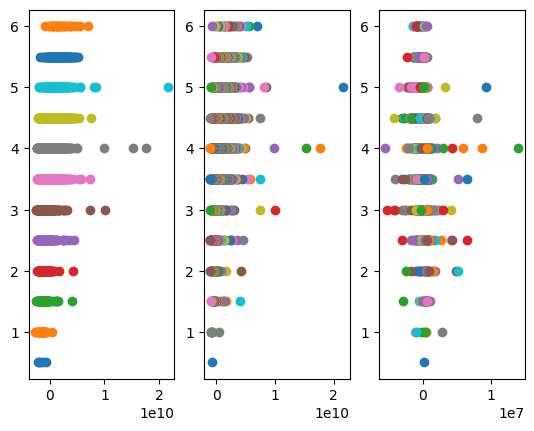

In [71]:
AC = AgglomerativeClustering(compute_full_tree='auto', linkage='complete')
AC.fit(PCA_aff)
label_AC = meanS.labels_

ax1 = plt.subplot(131)
for i in u_truth:
    ax1.plot(PCA_aff.pca0[YTRAIN.score == i], YTRAIN.score[YTRAIN.score == i], 'o')

ax2 = plt.subplot(132)
u_labels = np.unique(label_aff)
for i in u_labels:
    ax2.plot(PCA_aff.pca0[label_AC == i], YTRAIN.score[label_AC == i], 'o')

ax3 = plt.subplot(133)
u_labels = np.unique(label_aff)
for i in u_labels:
    ax3.plot(PCA_aff.pca1[label_AC == i], YTRAIN.score[label_AC == i], 'o')
plt.show()

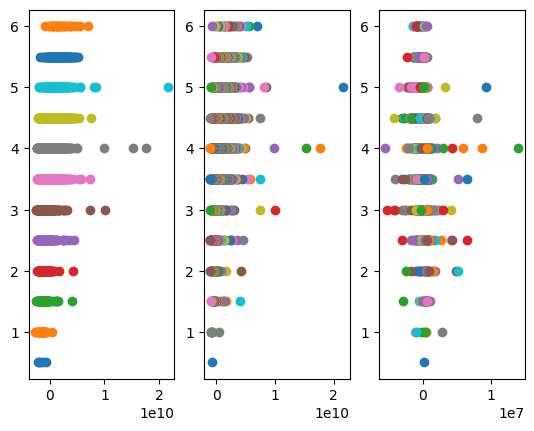

In [72]:
AC = AgglomerativeClustering(compute_full_tree='auto', linkage='ward')
AC.fit(PCA_aff)
label_AC = meanS.labels_

ax1 = plt.subplot(131)
for i in u_truth:
    ax1.plot(PCA_aff.pca0[YTRAIN.score == i], YTRAIN.score[YTRAIN.score == i], 'o')

ax2 = plt.subplot(132)
u_labels = np.unique(label_aff)
for i in u_labels:
    ax2.plot(PCA_aff.pca0[label_AC == i], YTRAIN.score[label_AC == i], 'o')

ax3 = plt.subplot(133)
u_labels = np.unique(label_aff)
for i in u_labels:
    ax3.plot(PCA_aff.pca1[label_AC == i], YTRAIN.score[label_AC == i], 'o')
plt.show()

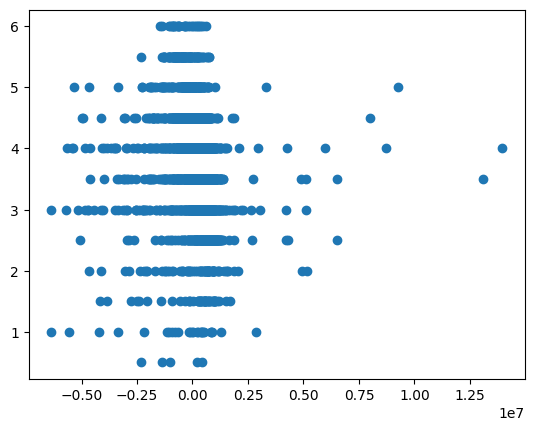

In [74]:
plt.scatter(PCA_aff.pca1, YTRAIN.score)
plt.show()

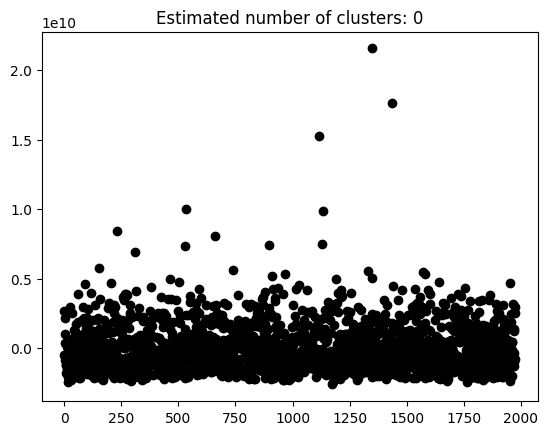

In [91]:
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan.fit(PCA_aff)
labels = dbscan.labels_
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = PCA_aff[class_member_mask & core_samples_mask]
    plt.plot(
        xy.pca0,
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = PCA_aff[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy.pca0,
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

In [120]:
three_groups = PCA_aff[YTRAIN.score < 2]
three_groups_Y = YTRAIN[YTRAIN.score < 2]

truth_groups = np.unique(three_groups_Y)

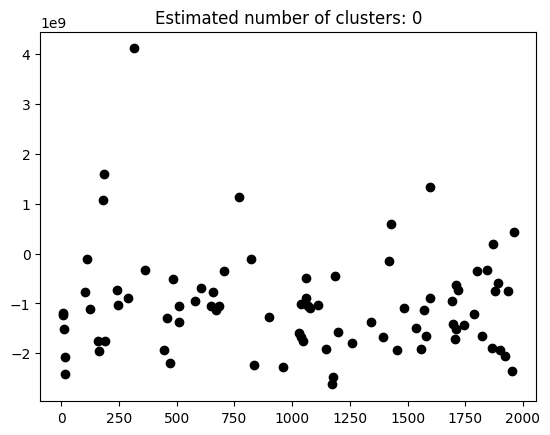

In [100]:
dbscan = DBSCAN(eps=0.05, min_samples=10)
dbscan.fit(three_groups)
labels = dbscan.labels_
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = three_groups[class_member_mask & core_samples_mask]
    plt.plot(
        xy.pca0,
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = three_groups[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy.pca0,
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

In [108]:
X_trainK.iloc[:,[9,10,11,12]]

,mean_length_activity/length_down_event,max_length_activity/length_down_event,mean_length_activity-length_text_change,mean_length_activity/length_text_change
0,3.976723,7.0,4.329157,5.212273
1,3.886506,13.0,4.543659,5.488499
2,3.676249,7.0,4.747877,5.500969
3,4.237823,5.0,4.202333,5.082783
4,3.979992,7.0,4.308735,5.320901
...,...,...,...,...
1971,3.141257,5.0,5.620275,6.547629
1972,3.403889,10.0,4.720231,5.251254
1973,3.805162,7.0,4.649194,5.359616
1974,4.008544,5.0,4.295062,5.127847


from matplotlib import pyplot as plt
_df_11['mean_length_activity/length_down_event'].plot(kind='hist', bins=20, title='mean_length_activity/length_down_event')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12['max_length_activity/length_down_event'].plot(kind='hist', bins=20, title='max_length_activity/length_down_event')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['mean_length_activity-length_text_change'].plot(kind='hist', bins=20, title='mean_length_activity-length_text_change')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['mean_length_activity/length_text_change'].plot(kind='hist', bins=20, title='mean_length_activity/length_text_change')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15.plot(kind='scatter', x='mean_length_activity/length_down_event', y='max_length_activity/length_down_event', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='max_length_activity/length_down_event', y='mean_length_activity-length_text_change', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='mean_length_activity-length_text_change', y='mean_length_activity/length_text_change', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['mean_length_activity/length_down_event'].plot(kind='line', figsize=(8, 4), title='mean_length_activity/length_down_event')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['max_length_activity/length_down_event'].plot(kind='line', figsize=(8, 4), title='max_length_activity/length_down_event')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_20['mean_length_activity-length_text_change'].plot(kind='line', figsize=(8, 4), title='mean_length_activity-length_text_change')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_21['mean_length_activity/length_text_change'].plot(kind='line', figsize=(8, 4), title='mean_length_activity/length_text_change')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: xlabel='mean_length_activity/length_down_event', ylabel='max_length_activity/length_down_event'>

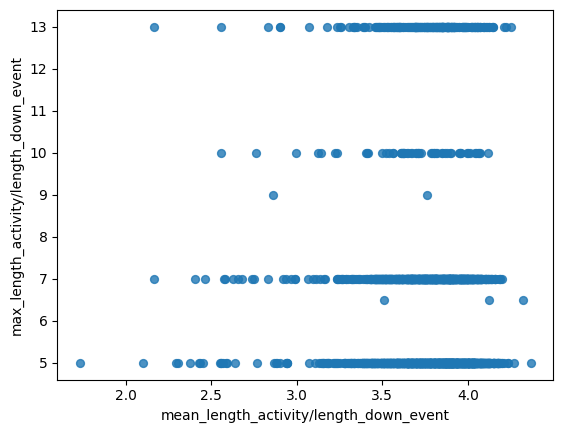

In [112]:
_df_15.plot(kind='scatter', x='mean_length_activity/length_down_event', y='max_length_activity/length_down_event', s=32, alpha=.8)


In [126]:
reduced_features_clusters = X_trainK[['mean_length_activity/length_down_event', 'max_length_activity/length_down_event']]
reduced_features_clusters

,mean_length_activity/length_down_event,max_length_activity/length_down_event
0,3.976723,7.0
1,3.886506,13.0
2,3.676249,7.0
3,4.237823,5.0
4,3.979992,7.0
...,...,...
1971,3.141257,5.0
1972,3.403889,10.0
1973,3.805162,7.0
1974,4.008544,5.0


<Axes: xlabel='max_length_activity/length_down_event', ylabel='mean_length_activity-length_text_change'>

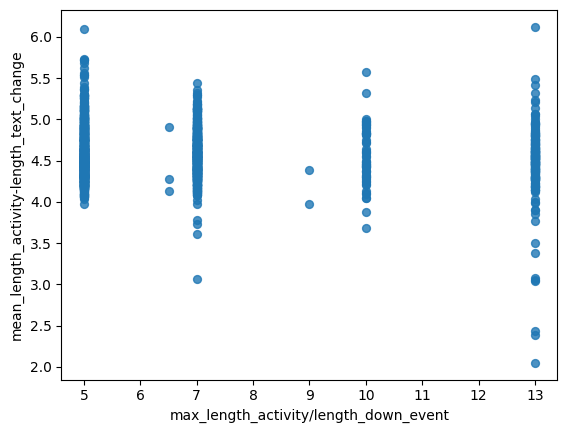

In [113]:
_df_16.plot(kind='scatter', x='max_length_activity/length_down_event', y='mean_length_activity-length_text_change', s=32, alpha=.8)


In [140]:
reduced_features_clusters2 = X_trainK[['max_length_activity/length_down_event', 'mean_length_activity-length_text_change']]
reduced_features_clusters2

,max_length_activity/length_down_event,mean_length_activity-length_text_change
0,7.0,4.329157
1,13.0,4.543659
2,7.0,4.747877
3,5.0,4.202333
4,7.0,4.308735
...,...,...
1971,5.0,5.620275
1972,10.0,4.720231
1973,7.0,4.649194
1974,5.0,4.295062


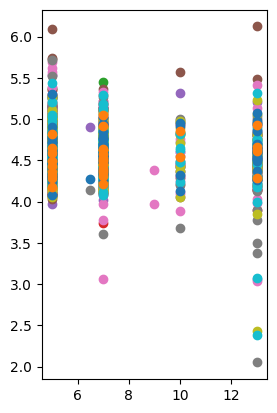

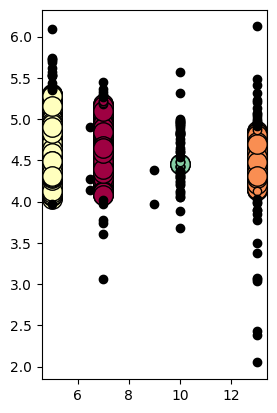

In [141]:
u_truth = np.unique(YTRAIN)
ax1 = plt.subplot(121)
for i in u_truth:
    ax1.plot(reduced_features_clusters2['max_length_activity/length_down_event'][YTRAIN.score == i], reduced_features_clusters2['mean_length_activity-length_text_change'][YTRAIN.score == i], 'o')
plt.show()

dbscan = DBSCAN(eps=0.05, min_samples=10)
dbscan.fit(reduced_features_clusters2)
labels = dbscan.labels_
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
ax2 = plt.subplot(122)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = reduced_features_clusters2[class_member_mask & core_samples_mask]
    ax2.plot(
        xy['max_length_activity/length_down_event'],
        xy['mean_length_activity-length_text_change'],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = reduced_features_clusters2[class_member_mask & ~core_samples_mask]
    ax2.plot(
        xy['max_length_activity/length_down_event'],
        xy['mean_length_activity-length_text_change'],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
#ax2.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

<Axes: xlabel='max_down_time', ylabel='sum_down_time'>

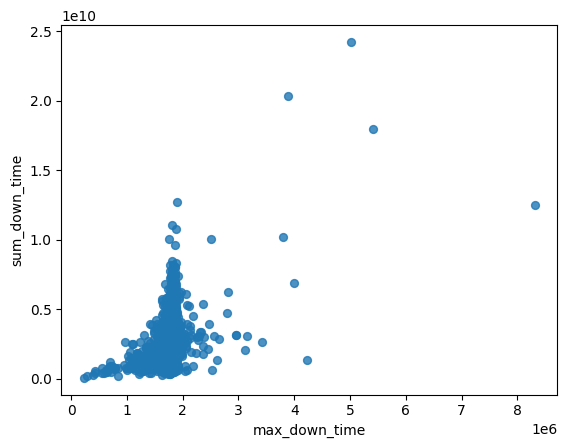

In [98]:
X_trainK.plot(kind='scatter', x='max_down_time', y='sum_down_time', s=32, alpha=.8)


In [142]:
YTRAIN

,score
0,3.5
1,5.5
2,5.0
3,2.5
4,5.0
...,...
1971,3.5
1972,2.5
1973,3.5
1974,5.5


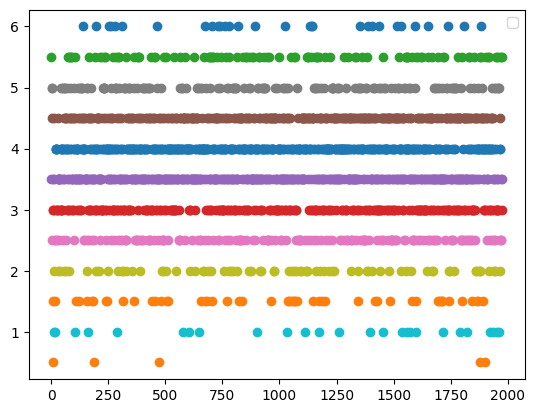

In [143]:
kmeans2 = KMeans(n_clusters=12, random_state=120, n_init="auto")
kmeans2.fit(YTRAIN)
label = kmeans2.labels_

u_labels = np.unique(label)

#plotting the results:

for i in u_labels:
    plt.plot(YTRAIN.score[label == i], 'o')
plt.legend()
plt.show()

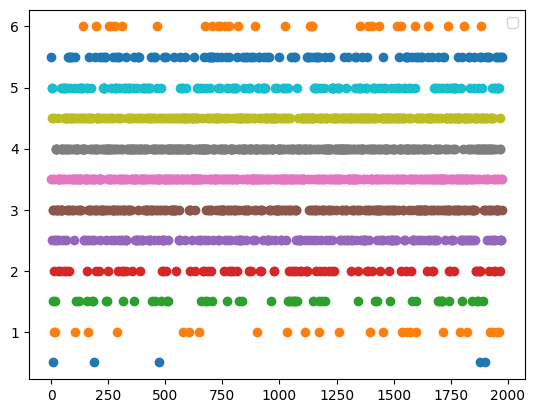

In [146]:
for i in u_truth:
    plt.plot(YTRAIN.score[YTRAIN.score == i], 'o')
plt.legend()
plt.show()